# Đồ án cuối kì môn lập trình khoa học dữ liệu

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

Đọc file DataScientist.csv và in ra 5 dòng đầu tiên



In [96]:
df = pd.read_csv('archive/data.csv',delimiter =';')
df.head(5)

,id_examinee,math,physics,chemistry,biology,history,geography,literature,civic_education,english,russian,french,chinese,german,japanese
0,1000002,9.2,NaN,NaN,NaN,5.75,9.75,8.25,9.25,10.0,NaN,NaN,NaN,NaN,NaN
1,1000003,4.4,NaN,NaN,NaN,4.25,4.00,6.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000004,8.4,4.00,3.00,3.50,NaN,NaN,6.75,NaN,10.0,NaN,NaN,NaN,NaN,NaN
3,1000005,8.8,8.25,5.75,5.25,NaN,NaN,8.25,NaN,9.4,NaN,NaN,NaN,NaN,NaN
4,1000006,8.0,NaN,NaN,NaN,5.00,6.50,8.75,9.25,8.6,NaN,NaN,NaN,NaN,NaN


tính số dòng và cột của data

In [97]:
num_rows,num_cols = df.shape
print(f'Number of rows: {num_rows}\nNumber of columns: {num_cols}')

Number of rows: 934617
Number of columns: 15


# C. Đặt và trả lời câu hỏi


## Câu hỏi 2

### Nội dung câu hỏi
Thống kê số lượng học sinh chọn thi bài thi tổ hợp

### Ý nghĩa khi trả lời câu hỏi
Giúp chúng ta có cái nhìn tổng quan về số lượng học sinh lựa chọn giữa bài thi tổ hợp tự nhiên và xã hội. Từ đó đưa ra nhận xét về khối tự nhiên và xã hội

Bài thi tổ hợp xã hội gồm có: Lịch sử, Địa lý, GDCD.

Lọc ra những học sinh thi bài thi tổ hợp xã hội. Những học sinh thi xã hội sẽ có điểm thi các môn tổ hợp xã hội khác `NaN`, điểm thi các môn tổ hợp tự nhiên có giá trị bằng `NaN`

In [98]:
#Ban xa hoi
social_science = df.loc[(np.isnan(df['physics']))& (np.isnan(df['chemistry'])) & (np.isnan(df['biology'])) & (np.isnan(
    df['history']) == False) & (np.isnan(df['geography']) == False) & (np.isnan(df['civic_education']) == False)]


Bài thi tổ hợp tự nhiên gồm có: Vật lý, Hóa học, Sinh học

Lọc ra những học sinh thi bài thi tổ hợp tự nhiên. Những học sinh thi tự nhiên sẽ có điểm thi các môn tổ hợp tự nhiên khác `NaN`, điểm thi các môn tổ hợp xã hội có giá trị bằng `NaN`

In [99]:
#Ban tu nhien
natural_science = df.loc[(np.isnan(df['physics']) == False)& (np.isnan(df['chemistry']) == False) & (np.isnan(df['biology']) == False) & (np.isnan(
    df['history']) == True) & (np.isnan(df['geography']) == True) & (np.isnan(df['civic_education']) == True)]


Những học sinh không chọn thi tổ hợp nào

Lọc ra những học sinh không thi bất kỳ 1 bài thi tổ hợp nào. Do đó sẽ có điểm thi các môn của 2 bài thi tổ hợp có giá trị bằng `NaN`

In [100]:
null = df.loc[(np.isnan(df['physics']))& (np.isnan(df['chemistry'])) & (np.isnan(df['biology'])) & (np.isnan(
    df['history']) == True) & (np.isnan(df['geography']) == True) & (np.isnan(df['civic_education']) == True)]

In [101]:
dict_nums_of_students ={
    "Natural Science": len(natural_science),
    "Social Science": len(social_science), 
    "None": len(null)
}

Biểu đồ cột thể hiện số lượng học sinh chọn những bài thi tổ hợp

Text(0.5, 0, 'The combined test')

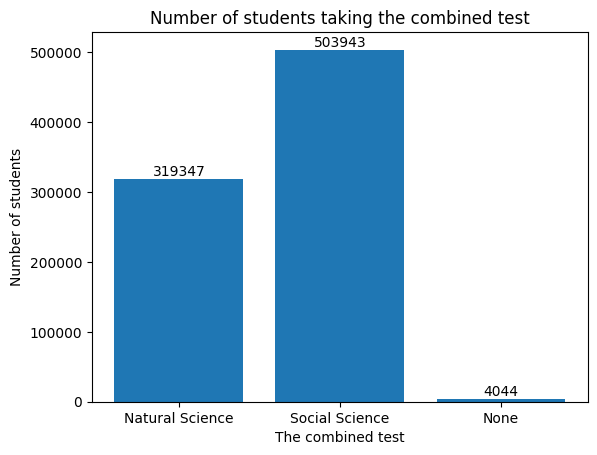

In [102]:
plt.bar(dict_nums_of_students.keys(),dict_nums_of_students.values())
for i in range(len(dict_nums_of_students.keys())):
    plt.text(i,list(dict_nums_of_students.values())[i],list(dict_nums_of_students.values())[i],ha='center', va='bottom')

plt.title('Number of students taking the combined test')
plt.ylabel('Number of students')
plt.xlabel('The combined test')

Biểu đồ tròn thể hiện phần trăm số lượng học sinh chọn bài thi tổ hợp

Text(0.5, 1.0, 'Percentage of students taking the combined test')

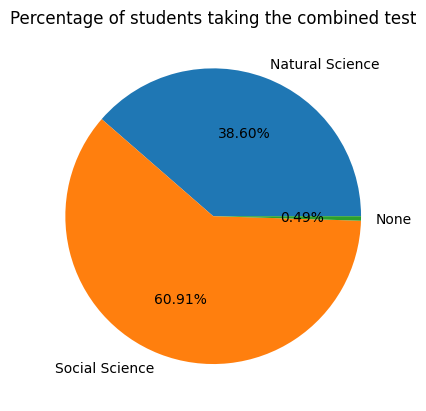

In [103]:
plt.pie(dict_nums_of_students.values(),labels=dict_nums_of_students.keys(),autopct='%0.2f%%')
plt.title("Percentage of students taking the combined test")

Nhận xét:

- Từ biểu đồ có thể thấy, số lượng học sinh chọn bài thi tổ hợp xã hội chiếm nhiều nhất, gấp hơn 1.5 lần số lượng học sinh chọn bài thi tổ hợp tự nhiên
- Có 0.49% ~ 4044 học sinh không chọn bài thi tổ hợp nào, có thể những học sinh đó đã bỏ thi tốt nghiệp
- Số lượng học sinh chọn bài thi tổ hợp xã hội nhiều hơn tự nhiên có thể vì một số học sinh chỉ thi tốt nghiệp và không dùng điểm đó để xét Đại học, cho nên lựa chọn bài thi xã hội sẽ đỡ vất vả hơn

Số lượng học sinh chọn các môn ngoại ngữ khác Tiếng anh

Lưu giá trị vào dictionary `foreign_language` với `key` là tên ngoại ngữ, `value` là số lượng học sinh thi môn ngoại ngữ tương ứng

In [104]:
foreign_languages = {
    'russian': df['russian'].dropna().count(),
    'french': df['french'].dropna().count(),
    'chinese': df['chinese'].dropna().count(),
    'german': df['german'].dropna().count(),
    'japanese': df['japanese'].dropna().count(),
}

Biểu đồ cột thể hiện số lượng học sinh thi các môn ngoại ngữ khác Tiếng anh

Text(0, 0.5, 'Number of students')

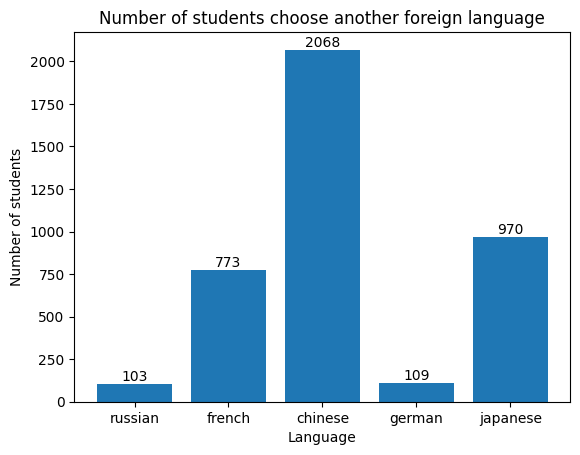

In [105]:
plt.bar(foreign_languages.keys(),foreign_languages.values())
for i in range(len(foreign_languages.keys())):
    plt.text(i,list(foreign_languages.values())[i],list(foreign_languages.values())[i],ha='center', va='bottom')

plt.title('Number of students choose another foreign language')
plt.xlabel('Language')
plt.ylabel('Number of students')